# Snapchat Political Ads

# Summary of Findings


### Introduction
Often times, advertisers or companies would like to optimize their resources in order to reach their preferred audience. Advertisers would often have different options to regulate different attributes that their ad, such as target region, age, and specific interests that the ad is related to. However, other factors that can influence the reach of ads may include which country the advertisement originated, the language the ad was in, and when the ad was produced. In this project, we will train a model in order to predict important and representative features of the ad. **Specifically, we will train different types of regression models and analyze their effectiveness in order to predict the amount of impressions of the ad.**

### Baseline Model
First, we went to https://www.snap.com/en-US/political-ads/ in order to obtain the two snapchat political ads csv files: one for the year 2018 and one for the year 2019. We convert both csv files into dataframes and then concatenate the data frames in order to get a singular set of data for our model. In this baseline model, the year that the ad was advertised may provide useful information, so a column indicating which year the ad was advertised was added to the dataframe.

Then, we begin to create our model pipelines and fit our model. 
1. We first drop all columns that are unique to each ad, such as the columns `'ADID', 'CreativeUrl', 'OrganizationName', 'BillingAddress', 'CandidateBallotInformation', 'PayingAdvertiserName', 'CreativeProperties', 'Impressions', 'StartDate', 'EndDate'.`

2. Then we will begin to use linear regression on the other columns. **Our pipeline will include a column transformer for all categorical columns which includes a simple imputer to change `nan` values into the string `‘NULL’` for computation and one hot encode all of the categorical columns as well as a simple imputer for numerical columns to change `nan` values into `0`.** 

This is purely a baseline model for our analysis that we will improve on later. We then finish our model pipeline by transforming our data set and using linear regression using a pipeline. 


In order to evaluate the effectiveness of our model, we will split our data set into 2 parts: a training set and a testing set. This is used in order to figure out whether our model is a victim of multicollinearity, or figure out whether our model is learning the individuals of its training set. We then train the model on the training set and test how well the model does on the testing set. **We will use two objectives to evaluate our model: R^2 to determine whether or not this is a decent model for predicting the training set `Impressions` and root mean squared error (RMSE) to determine how far away the predictions are from the real output.** 
* In this model, we have an **R^2 value of about 0.470420 and an RMSE of about 2422343 impressions.** 
    * The R^2 tells us that our model is not good at predicting our training set and the RMSE tells us that the residuals of the data is very far away from our fit. In fact, a distribution of 100 `train_test_split` model simulations gives us a distribution with **extremely high NEGATIVE R^2 values.** 
* This is an indicator that our baseline model is doing poorly in predicting the `Impressions` in the training set and is learning the individuals within its testing set instead of predicting `Impressions` values. We will then improve on this model. 


### Final Model
We will begin to improve our prediction model. 
1. We begin by looking at the columns of our data set, and notice how some columns of the data set contains a string of variables that state the included or excluded categories. These columns (which we will call ordinal columns) include `'Regions (Included)','Regions (Excluded)', 'Electoral Districts (Included)', 'Electoral Districts (Included)', 'Interests', 'Radius Targeting (Included)',  'Radius Targeting (Excluded)', 'Metros (Included)', 'Metros (Excluded)', 'Postal Codes (Included)', 'Postal Codes (Excluded)', 'Location Categories (Included)', 'Location Categories (Excluded)', 'AdvancedDemographics', 'AgeBracket'.` 
2. We also notice that the `AgeBracket` column contains multiple kinds of brackets and different age groups.
3. **Thus, we will improve our model pipeline by transforming these columns. We will ordinal encode all the ordinal columns by the amount of variables they have included in the string and we will transform the `AgeBracket` column by computing the midpoint of the bracket based on the age demographic of most Snapchat users.** 
    * The reasoning behind the `AgeBracket` transformation is put in more detail in project 3, but the main point is that the majority of Snapchat users are around ages 13 - 24 (from , https://influencermarketinghub.com/snapchat-statistics-revenue/) thus midpoints and age brackets will reflect this type of majority. 
4. Additionally, one hot encoded columns may be very correlated with one another, such as `Targeting Connection Type` and `Targeting Carrier (ISP)` (as the internet connection used may be the same as the internet carrier). 

We once again evaluate the effectiveness of our model by splitting our data set into 2 parts: a training set and a testing set. 
* In this improved model, we have an **R^2 value of about 0.729394 and an RMSE of about 1942910 impressions.** 
    * The R^2 tells us that our improved model is a better model than our baseline model and the improved model has a lower RMSE than the baseline model by about 479430 impressions. A distribution of 100 `train_test_split` improved model simulations gives us a distribution with **R^2 values close to 0.5 and above, but still includes some negative R^2 values.**
* This is an indicator that our improved model is doing better in predicting the `Impressions` in the training set than our baseline model.

Additionally, we can create a `DecisionTreeClassifier` from the `sklearn` ML-pipeline and use the numerical columns of our data set in order to predict the `Impressions`. Additionally, we can determine which parameter in this model is being used the most to predict our `Impressions`. 
* We first take the numerical columns, 'Spend', 'Targeting Connection Type', 'Targeting Carrier (ISP)', 'Year', and train_test_split using the numerical columns. 
* We then create a DecisionTreeClassifier and then train our model on the training set and test our results on both the training set and the test set. 
* The R^2 value for our sklearn model for the training set is around 0.471929, about the same as our baseline model, but the R^2 value using the test set is around 0.001020, an extremely low R^2 value. The RMSE for the test set is actually better than our improved model, about 1720453 impressions. 
* A distribution of 100 `train_test_split` sklearn model simulations gives us a distribution with **R^2 values between 0 and 0.002.** This is an indicator that our sklearn model still needs improvement, but is doing relatively better than our baseline model.

We can see that using parameters from our sklearn model, the decision tree used Spend the most while making decisions and not using `Targeting Connection Type` or `Targeting Carrier (ISP)` at all (mainly due to the fact that they are all empty nan values). We can also see the **max depth of the decision tree created (480)** and the **number of nodes (if else statements) of the tree (2717)**. These values are gigantic and a result of learning the individuals instead of predicting. We can then change the max depth of the tree and determine which **max depth gives us the greatest R^2 score, which is at 2, 222, 302, 402, and 442 max depth.**

### Fairness Evaluation
Models may often run into some biases when predicting outcomes from their test data. One particular group within the data may experience a lower quality in their predictions than another group due to being a minority in the training data. We will evaluate our improved model by looking at the `Spend` column. Spending the correct amount of money for advertisements may be crucial for a campaign or company’s position in society. Spending too much money and getting back a lower than expected impressions expends valuable resources that could have been allocated to other areas. Spending too little money and getting higher than expected impressions makes the company lose out on the opportunity cost of more viewers and advertisement influences. Although our model predicts impressions with `Spend` as one of its variables, we want to know whether or not our model works better on more expensive ads or cheaper ads and allow advertisers to be more skeptical about these predictions. Thus we will use a permutation test to determine fairness in our model and use the RMSE for `Impressions` to ask whether or not higher or lower spend influences prediction. More specifically, we will ask the question: **do ads with a lower spend have close prediction results to actual results for `Impressions` than ads with a higher spend?**

We first replicate the same process of model training and testing as we did with our improve model. We will then create a bar graph visualization that visualizes the RMSE of different spends based on brackets of bin 1000s. 
* We used the mean to determine whether or not an ad will be a high spend ad or a low spend ad because a majority of the ads in the data are within the low range of spend, but the mean allows us to encompass more expensive ads that would otherwise seem “cheap” but look slightly expensive considering all other ads. 
Looking at this graph, it is clear that the RMSE increases as spend increases. A table is made in order to demonstrate that high spending ads tend to have a high RMSE in our model. In our question, we wanted to ask ads with a lower spend have close prediction results to actual results than ads with a higher spend. We first create a null hypothesis that we can simulate and an alternative hypothesis. **Our test statistic will be difference in RMSE between high spend ads and low spend ads. Thus our null hypothesis and alternative hypothesis are:**

𝐻0:  The RMSE for ads with a higher spend is about the same compared to ads with a lower spend
𝐻𝛼:  The RMSE for ads with a higher spend is greater than ads with a lower spend
We will then run a hypothesis test with a significance level of  𝛼  = 0.05 to analyze whether or not we should be in favor of our null hypothesis or our alternative hypothesis.

1. When calculating our observed difference in RMSE for ads with low spend vs. high spend, we get around -11176600. This is interpreted as ads with low spend having an RMSE that is lower than high spend ads by about 11176600 Impressions.
2. We then simulate the null hypothesis by randomly shuffling the label of high spend and low spend. We repeat this 1000 times and get a distribution of differences.
3. To compute the p-value, we find the proportion of times in which our sampled differences are less than or equal to our observed difference (low spend RMSE - high spend RMSE).
4. We find that the **p-value is 0.00**, indicating that there are no differences generated from our sampled differences that are less than our observed difference. Because the **p-value <  𝛼**, we reject our null hypothesis that ads with a lower spend have similar prediction results to actual results compared to ads with a higher spend in favor of our alternative hypothesis that ads with a lower spend have closer prediction results to actual results than ads with a higher spend. **We can then conclude based on our hypothesis test that our model has a larger bias in having better predictions of `Impressions` for lower spending ads than higher spending ads.**


# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics

### Baseline Model

In [3]:
# We downloaded the csv files and converted the files into a dataframe
ads_2018 = os.path.join('data', 'PoliticalAds - 2018.csv')
ads_2019 = os.path.join('data', 'PoliticalAds - 2019.csv')

#split into 2018 and 2019 year
political_ads_2018 = pd.read_csv(ads_2018)
political_ads_2019 = pd.read_csv(ads_2019)

# Add years to each dataframe indicating which year that the ad was advertised
political_ads_2018 = political_ads_2018.assign(Year = [2018] * len(political_ads_2018))
political_ads_2019 = political_ads_2019.assign(Year = [2019] * len(political_ads_2019))

# concatinate the two dataframes and 
# create one political ads dataframe with the two years
political_2018_2019=pd.concat([political_ads_2018,political_ads_2019],ignore_index=True)

In [4]:
political_2018_2019.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,Year
0,1136caa80e38faf9c6cad855be7f27ea3065d3cf69c8cf...,https://www.snap.com/political-ads/asset/8bbcc...,USD,103,23669,2018/11/02 22:38:51Z,2018/11/07 02:00:00Z,BCom Solutions,"919 Central Ave,Auburn,68305,US",NaN,...,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://therealbenhansen.com/,2018
1,c078fba4ecd4062a241e063efa75ad61f3c459a6f50b08...,https://www.snap.com/political-ads/asset/a4972...,USD,1656,456576,2018/10/29 17:40:22Z,2018/11/04 04:00:00Z,ACRONYM,US,NaN,...,NaN,"Advocates & Activists,Basketball Fans,Bookworm...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://plan.showupto.vote/,2018
2,966f103cba530d8c84fc487f2dd22030fcba01a7a2b46a...,https://www.snap.com/political-ads/asset/f98be...,USD,832,75553,2018/10/18 18:36:25Z,2018/11/06 23:00:00Z,Bully Pulpit Interactive,"1140 Connecticut Ave NW, Suite 800,Washington,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,1092ee8cd81a5e3927fc2949f0ebb69a37c70691b5180e...,https://www.snap.com/political-ads/asset/4e111...,USD,77,27808,2018/11/03 07:00:01Z,2018/11/06 07:59:59Z,Mammoth,"501 East Pine St #201,Seattle,98122,US",NaN,...,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://kingcounty.gov/depts/elec...,2018
4,e59ec85002aaab5abc6b6c8ed2743f6420df559ee4b1a0...,https://www.snap.com/political-ads/asset/9dfa5...,USD,55,15862,2018/09/25 20:57:04Z,2018/09/30 03:59:59Z,ACRONYM,US,NaN,...,NaN,"Collegiates,Green Living Enthusiasts,Outdoor &...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://join.knockthe.vote,2018


In [5]:
# drop unique attributes for each ad
X = political_2018_2019.drop(['ADID', 'CreativeUrl', 'OrganizationName',
                              'BillingAddress', 'CandidateBallotInformation',
                              'PayingAdvertiserName', 'CreativeProperties', 'Impressions', 
                              'StartDate', 'EndDate'], axis=1)

# Predicting impressions with regressions model
y = political_2018_2019['Impressions']

In [6]:
X.head()

,Currency Code,Spend,Gender,AgeBracket,CountryCode,Regions (Included),Regions (Excluded),Electoral Districts (Included),Electoral Districts (Excluded),Radius Targeting (Included),...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Year
0,USD,103,NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,2018
1,USD,1656,MALE,18+,united states,"Florida,Michigan,Minnesota,Georgia,Wisconsin,P...",NaN,NaN,NaN,NaN,...,NaN,NaN,"Advocates & Activists,Basketball Fans,Bookworm...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,2018
2,USD,832,NaN,18-34,united states,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,USD,77,NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,2018
4,USD,55,NaN,18-34,united states,Florida,NaN,NaN,NaN,NaN,...,NaN,NaN,"Collegiates,Green Living Enthusiasts,Outdoor &...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,2018


In [7]:
# differentiate categorial columns and numerical columns
types = X.dtypes
catcols = types.loc[types == np.object].index
numcols = types.loc[types != np.object].index

In [7]:
# create pipeline for categoricals and numericals

# for categorical: impute nan values with string NULL and one hot encode columns
cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
])

# for numericals: impute nan values with 0
ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

# pipeline for transforming columns and linear regression
pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

In [8]:
# split into training set and testing set
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

# fit pipeline on training set and test for R^2 score on testing set
pl.fit(X_tr, y_tr)
pl.score(X_ts, y_ts)

0.47042030067502216

In [9]:
# Find root mean squared error for prediction
rmse = np.sqrt(np.mean((pl.predict(X_ts) - y_ts)**2))
rmse

2422343.0465238197

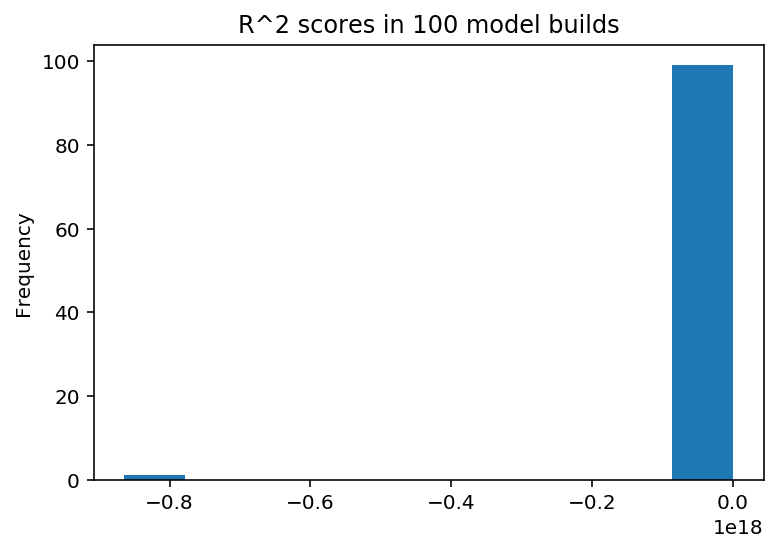

In [10]:
# distribution of R^2 scores over 100 model builds
out = []
for _ in range(100):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    pl.fit(X_tr, y_tr)
    out.append(pl.score(X_ts, y_ts))
pd.Series(out).plot(kind='hist', title='R^2 scores in 100 model builds');

### Final Model

In [84]:
# looking more at the columns of the data, we can transform columns differently and
# use this information to update our model
political_2018_2019[['Regions (Included)','Regions (Excluded)', 'AgeBracket']].head()

# there are categorical columns that we could ordinal encode as well as transform the 
# AgeBracket and use pca on correlated categorical columns

,Regions (Included),Regions (Excluded),AgeBracket
0,NaN,NaN,18+
1,"Florida,Michigan,Minnesota,Georgia,Wisconsin,P...",NaN,18+
2,NaN,NaN,18-34
3,NaN,NaN,18+
4,Florida,NaN,18-34


In [85]:
# differentiate columns based on type
types = political_2018_2019.dtypes

# drop unique attributes for each ad
specificscols = ['ADID', 'CreativeUrl', 'OrganizationName', 'BillingAddress',
                 'CandidateBallotInformation', 'PayingAdvertiserName',
                 'CreativeProperties', 'Impressions', 'StartDate', 'EndDate']

# ordinal columns that will be used to ordinal encode
ordinalcols = ['Regions (Included)','Regions (Excluded)',
               'Electoral Districts (Included)', 'Electoral Districts (Excluded)',
               'Interests', 'Radius Targeting (Included)',
               'Radius Targeting (Excluded)', 'Metros (Included)','Metros (Excluded)',
               'Postal Codes (Included)', 'Postal Codes (Excluded)',
               'Location Categories (Included)','Location Categories (Excluded)',
               'AdvancedDemographics', 'AgeBracket']

# categorical columns that will be used to one hot encode
catcols = [i for i in types.loc[types == np.object].index if i not in ordinalcols
           and i not in specificscols]

# numerical columns
numcols = [i for i in types.loc[types != np.object].index 
           if i not in ordinalcols 
           and i not in specificscols and i != 'Impressions']

In [86]:
# ordinal encode based on the number of variables/targets

def ordinal_tranf(val):
    # if val is a nan value, then there are no restricted targets
    if type(val) != str and math.isnan(val):
        return 0
    # else encode the number of restricted targets for the column
    else:
        return len(val.split(','))

# clean age bracket into midpoint age target
def find_AgeBracket_midpoint(bracket):
    
    # midpoint of general snapchat audience of ages 13-24
    if type(bracket) != str and math.isnan(bracket):
        return 18.5
    
    else:
        # min age is always 2 digits
        min_age = bracket[:2]
        # find max age
        max_age = bracket[-2:]
        # if max age is 2 digits, then continue
        try:
            int(max_age)
        # else there is no max age limit for targeting, set max age to 24
        except:
            max_age = 24
        #return midpoint
        return (int(min_age) + int(max_age)) / 2

In [87]:
# transform ordinal columns
X = pd.DataFrame()
for i in ordinalcols:
    # AgeBracket to midpoint age target
    if i == 'AgeBracket':
        X[i] = political_2018_2019[i].apply(find_AgeBracket_midpoint)
    # ordinal columns into number of variables/targets
    else:
        X[i] = political_2018_2019[i].apply(ordinal_tranf)

In [88]:
X = pd.concat([X, political_2018_2019[numcols]], axis=1)
X = pd.concat([X, political_2018_2019[catcols]], axis = 1)
y = political_2018_2019['Impressions']

In [89]:
# improved categorical pipeline: imputer for null values, 
# one hot encoder for categorical columns, and pca to drop correlated features
cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', PCA(svd_solver='full', n_components=0.99))
])

# for numericals: impute nan values with 0
ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

# pipeline for transforming columns and linear regression
pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

In [47]:
# split into training set and testing set
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

# fit pipeline on training set and test for R^2 score on testing set
pl.fit(X_tr, y_tr)
pl.score(X_ts, y_ts)

0.7293938885559703

In [48]:
# Find root mean squared error for prediction
rmse = np.sqrt(np.mean((pl.predict(X_ts) - y_ts)**2))
rmse

1942906.516086966

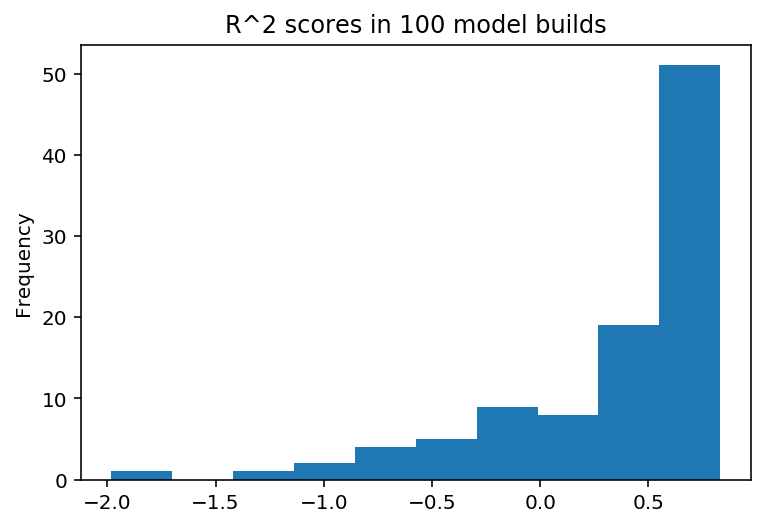

In [49]:
# distribution of R^2 scores over 100 improved model builds
out = []
for _ in range(100):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    pl.fit(X_tr, y_tr)
    out.append(pl.score(X_ts, y_ts))
pd.Series(out).plot(kind='hist', title='R^2 scores in 100 model builds');

In [81]:
# sklearn ML-pipeline

In [90]:
# new model using the DecisionTreeClassifier with determining impressions

# only use numerical columns for predicting using DecisionTreeClassifier
X = political_2018_2019[numcols].fillna(0)
y = political_2018_2019.Impressions

In [91]:
# split our model into training and testing set
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
clf = DecisionTreeClassifier()
clf.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
# R^2 score of our DecisionTree training set
clf.score(X_tr, y_tr)

0.471929227628445

In [93]:
# R^2 score of our DecisionTree testing set
clf.score(X_ts, y_ts)

0.0010204081632653062

In [94]:
# Find root mean squared error for prediction
rmse = np.sqrt(np.mean((clf.predict(X_ts) - y_ts)**2))
rmse

1720453.9473398626

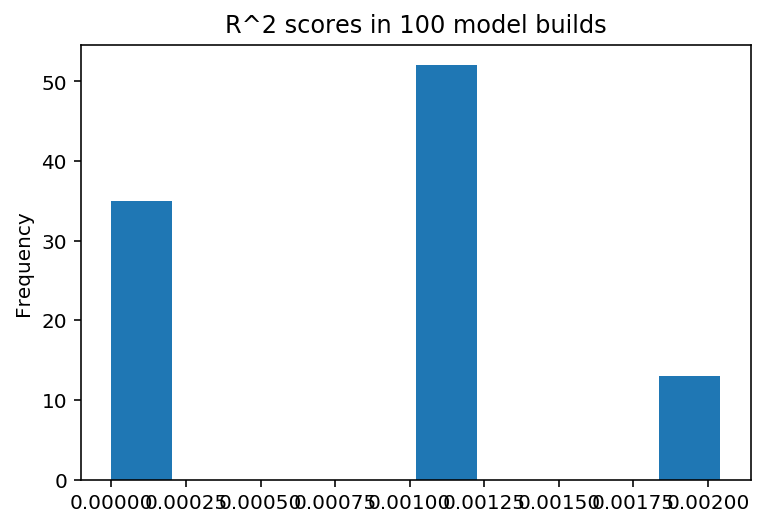

In [95]:
# distribution of R^2 scores over 100 Decision Tree model builds
out = []
for _ in range(100):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    clf.fit(X_tr, y_tr)
    out.append(clf.score(X_ts, y_ts))
pd.Series(out).plot(kind='hist', title='R^2 scores in 100 model builds');

In [96]:
# determining the best predictor of Impressions using numerical
# columns on a DecisionTreeClassifier
dict(zip(X.columns, clf.feature_importances_))

{'Spend': 0.9874943227032243,
 'Targeting Connection Type': 0.0,
 'Targeting Carrier (ISP)': 0.0,
 'Year': 0.012505677296775633}

In [97]:
# look at the depth and see how deep is the tree
# it's unreasonably large, literally has learned the individuals
clf.tree_.max_depth

480

In [98]:
# counts the amount of node within the decision tree
# there are 2703 if/else statements within the tree!
# the model has learned the individuals
clf.tree_.node_count

2717

In [107]:
# determine the best score based on max_depth
params = np.arange(2,500,20)

param_score = {}
for i in params:
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    # create DecisionTreeClassifiers
    clfs = DecisionTreeClassifier(max_depth=params)
    clf.fit(X_tr, y_tr)
    
    # dict of max_depth to score
    param_score[i] = clf.score(X_ts, y_ts)

In [110]:
param_score

{2: 0.0020408163265306124,
 22: 0.0010204081632653062,
 42: 0.0010204081632653062,
 62: 0.0010204081632653062,
 82: 0.0010204081632653062,
 102: 0.0,
 122: 0.0,
 142: 0.0010204081632653062,
 162: 0.0,
 182: 0.0010204081632653062,
 202: 0.0010204081632653062,
 222: 0.0020408163265306124,
 242: 0.0010204081632653062,
 262: 0.0010204081632653062,
 282: 0.0010204081632653062,
 302: 0.0020408163265306124,
 322: 0.0010204081632653062,
 342: 0.0,
 362: 0.0010204081632653062,
 382: 0.0010204081632653062,
 402: 0.0020408163265306124,
 422: 0.0010204081632653062,
 442: 0.0020408163265306124,
 462: 0.0010204081632653062,
 482: 0.0010204081632653062}

### Fairness Evaluation

In [59]:
# differentiate columns based on type
types = political_2018_2019.dtypes

# drop unique attributes for each ad
specificscols = ['ADID', 'CreativeUrl', 'OrganizationName', 'BillingAddress',
                 'CandidateBallotInformation', 'PayingAdvertiserName',
                 'CreativeProperties', 'Impressions', 'StartDate', 'EndDate']

# ordinal columns that will be used to ordinal encode
ordinalcols = ['Regions (Included)','Regions (Excluded)',
               'Electoral Districts (Included)', 'Electoral Districts (Excluded)',
               'Interests', 'Radius Targeting (Included)', 'Radius Targeting (Excluded)',
               'Metros (Included)', 'Metros (Excluded)',
               'Postal Codes (Included)', 'Postal Codes (Excluded)',
               'Location Categories (Included)', 'Location Categories (Excluded)',
               'AdvancedDemographics', 'AgeBracket']

# categorical columns that will be used to one hot encode
catcols = [i for i in types.loc[types == np.object].index if i not in ordinalcols
           and i not in specificscols]

# numerical columns
numcols = [i for i in types.loc[types != np.object].index if i not in ordinalcols
           and i not in specificscols if i != 'Impressions']

In [60]:
# transform ordinal columns
X = pd.DataFrame()
for i in ordinalcols:
    # AgeBracket to midpoint age target
    if i == 'AgeBracket':
        X[i] = political_2018_2019[i].apply(find_AgeBracket_midpoint)
    # ordinal columns into number of variables/targets
    else:
        X[i] = political_2018_2019[i].apply(ordinal_tranf)

In [61]:
X = pd.concat([X, political_2018_2019[numcols]], axis=1)
X = pd.concat([X, political_2018_2019[catcols]], axis = 1)
y = political_2018_2019['Impressions']

In [62]:
# improved categorical pipeline: imputer for null values, 
# one hot encoder for categorical columns, and pca to drop correlated features
cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', PCA(svd_solver='full', n_components=0.99))
])

# for numericals: impute nan values with 0
ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

# pipeline for transforming columns and linear regression
pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

In [63]:
# split into training set and testing set
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

# fit pipeline on training set and predict the Impressions on the training set
pl.fit(X_tr, y_tr)
preds = pl.predict(X_ts)

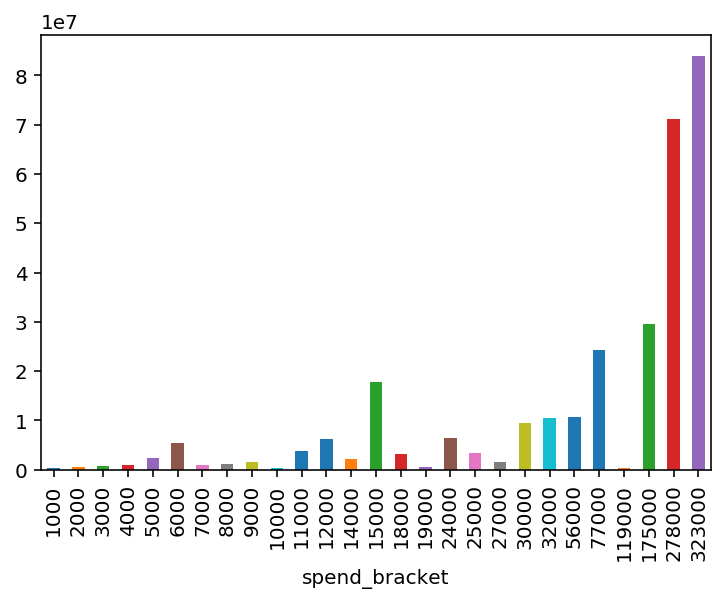

In [64]:
# create a new dataframe that contains bracket of spend amounts (by the 1000s),
# Impression predictions, and actual amount of Impressions
results=X_ts.assign(spend_bracket=X_ts['Spend'].apply(lambda x:1000*(x//1000+1)))
results=results.assign(prediction=preds)
results=results.assign(test_impressions=y_ts)
(
    results
    .groupby('spend_bracket')
    .apply(lambda x: np.sqrt(np.mean((x.prediction - x.test_impressions)**2)))
    .plot(kind='bar')
)

# RMSE seems to be high for high spenders

In [70]:
# use the mean of spends to determine what is high and low spend
results.Spend.mean()

1960.9

In [71]:
# split amount spent on ad to low spend and high spend
results = (
    results.assign(amt_spent = (results.Spend < 1960.9)
                   .replace({True:'low', False:'high'}))

# RMSE based on whether or not spend is low or high
(
    results.groupby('amt_spent')
    .apply(lambda x: np.sqrt(np.mean((x.prediction - x.test_impressions)**2)))
    .to_frame()
)

,0
amt_spent,
high,1.149660e+07
low,3.199551e+05


In [77]:
# observed difference for RMSE in low spend - high spend
obs = (
    results.groupby('amt_spent')
    .apply(lambda x: np.sqrt(np.mean((x.prediction - x.test_impressions)**2)))
    .diff().iloc[-1]
)
obs

-11176641.62398414

p-value is equal to 0.0
observed TVD of RMSE is -11176641.62398414


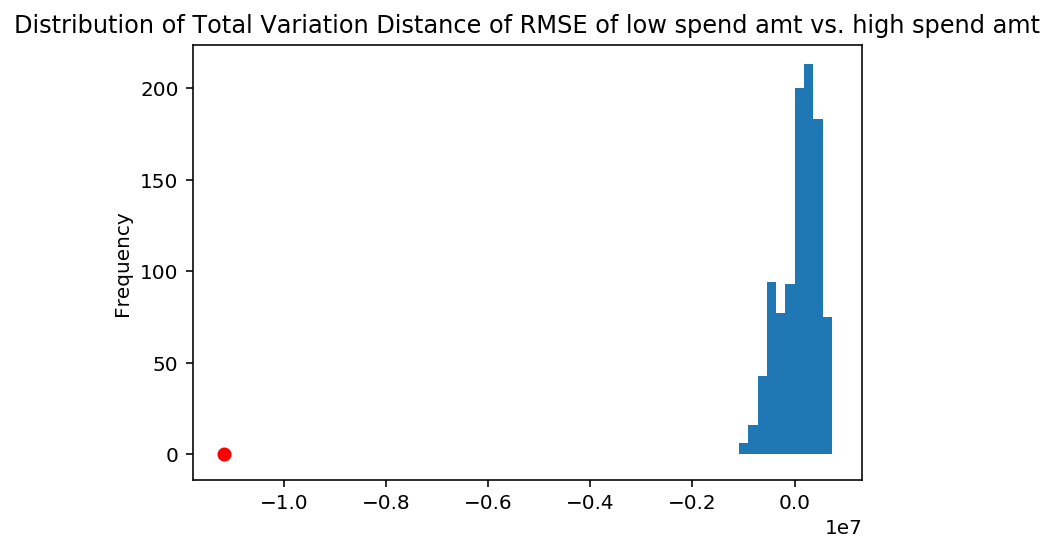

In [78]:
metrs = []
# 100 simulations of null hypothesis
for _ in range(1000):
    # shuffle low spend and high spend labels
    # calculate the difference for RMSE's
    s = (
        results[['amt_spent', 'prediction', 'test_impressions']]
        .assign(amt_spent=results.amt_spent.sample(frac=1.0, replace=False)
                .reset_index(drop=True))
        .groupby('amt_spent')
        .apply(lambda x: np.sqrt(np.mean((x.prediction - x.test_impressions)**2)))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)

# calculate p-value, observed TVD of RMS
print('p-value is equal to ' + str(pd.Series(metrs <= obs).mean()))
print('observed TVD of RMSE is ' + str(obs))
title = 'Distribution of Total Variation Distance of RMSE of low spend amt vs. high spend amt'
pd.Series(metrs).plot(kind='hist', title=title)
plt.scatter(obs, 0, c='r')